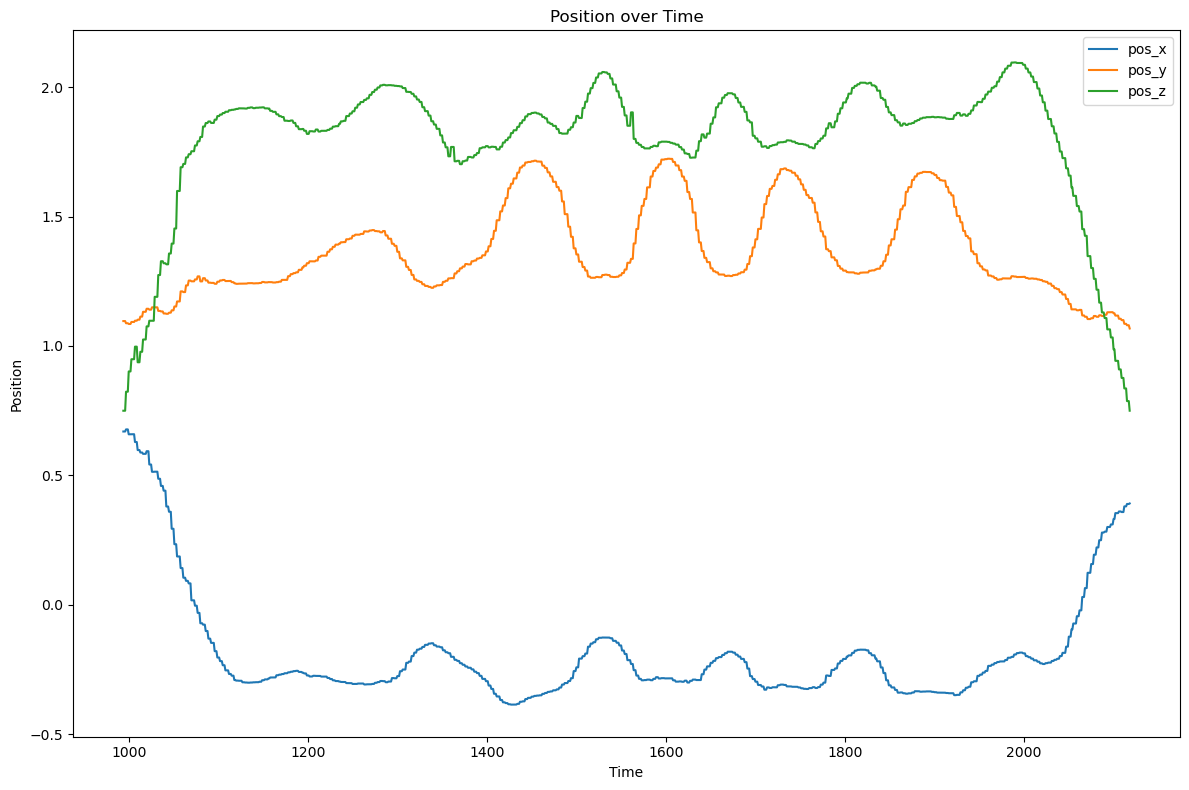

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot(csv_file_path):
    # Load the CSV file
    data = pd.read_csv(csv_file_path)
    
    # Identify the first row where movement starts
    threshold = 1e-6  # Small threshold to account for floating-point precision issues
    non_stationary_index_start = data[(data.diff().abs() > threshold).any(axis=1)].index[0]
    
    # Identify the last row where movement ends
    non_stationary_index_end = data[(data.diff().abs() > threshold).any(axis=1)].index[-1]
    
    # Remove leading and trailing stationary data
    cleaned_data = data.iloc[non_stationary_index_start:non_stationary_index_end + 1]
    
    # Plotting the position data
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot positions
    ax.plot(cleaned_data.index, cleaned_data[['pos_x', 'pos_y', 'pos_z']])
    ax.set_title('Position over Time')
    ax.set_ylabel('Position')
    ax.set_xlabel('Time')
    ax.legend(['pos_x', 'pos_y', 'pos_z'])
    
    plt.tight_layout()
    plt.show()

# Provide the path to your CSV file
csv_file_path = '/home/awear/ros2_data/all_topics/_joint2_pos_rot.csv'
process_and_plot(csv_file_path)


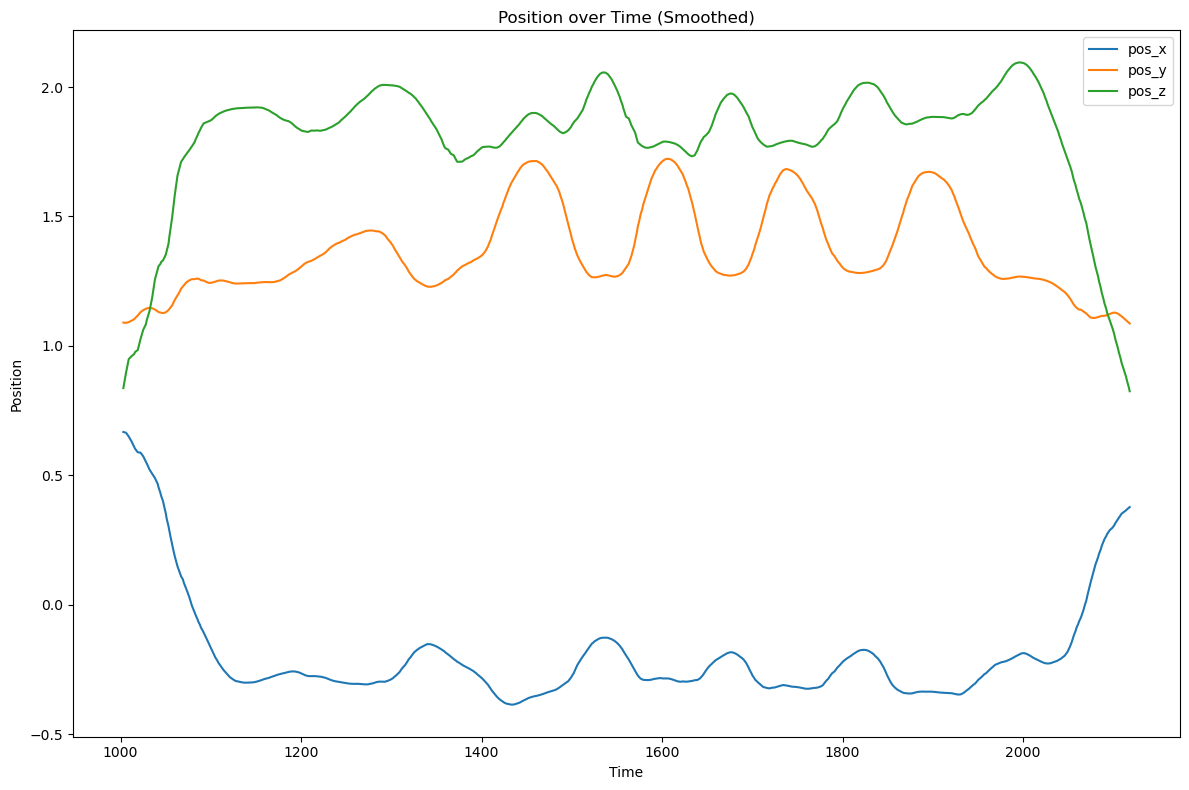

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def process_and_plot(csv_file_path, window_size=10):
    # Load the CSV file
    data = pd.read_csv(csv_file_path)
    
    # Identify the first row where movement starts
    threshold = 1e-6  # Small threshold to account for floating-point precision issues
    non_stationary_index_start = data[(data.diff().abs() > threshold).any(axis=1)].index[0]
    
    # Identify the last row where movement ends
    non_stationary_index_end = data[(data.diff().abs() > threshold).any(axis=1)].index[-1]
    
    # Remove leading and trailing stationary data
    cleaned_data = data.iloc[non_stationary_index_start:non_stationary_index_end + 1]
    
    # Apply moving average for smoothing
    smoothed_data = cleaned_data[['pos_x', 'pos_y', 'pos_z']].rolling(window=window_size).mean()
    
    # Plotting the position data
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot positions
    ax.plot(smoothed_data.index, smoothed_data[['pos_x', 'pos_y', 'pos_z']])
    ax.set_title('Position over Time (Smoothed)')
    ax.set_ylabel('Position')
    ax.set_xlabel('Time')
    ax.legend(['pos_x', 'pos_y', 'pos_z'])
    
    plt.tight_layout()
    plt.show()

# Provide the path to your CSV file
csv_file_path = '/home/awear/ros2_data/all_topics/_joint2_pos_rot.csv'
process_and_plot(csv_file_path)


/tmp/ipykernel_48636/854351606.py:3: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.0)
  from scipy.signal import butter, filtfilt


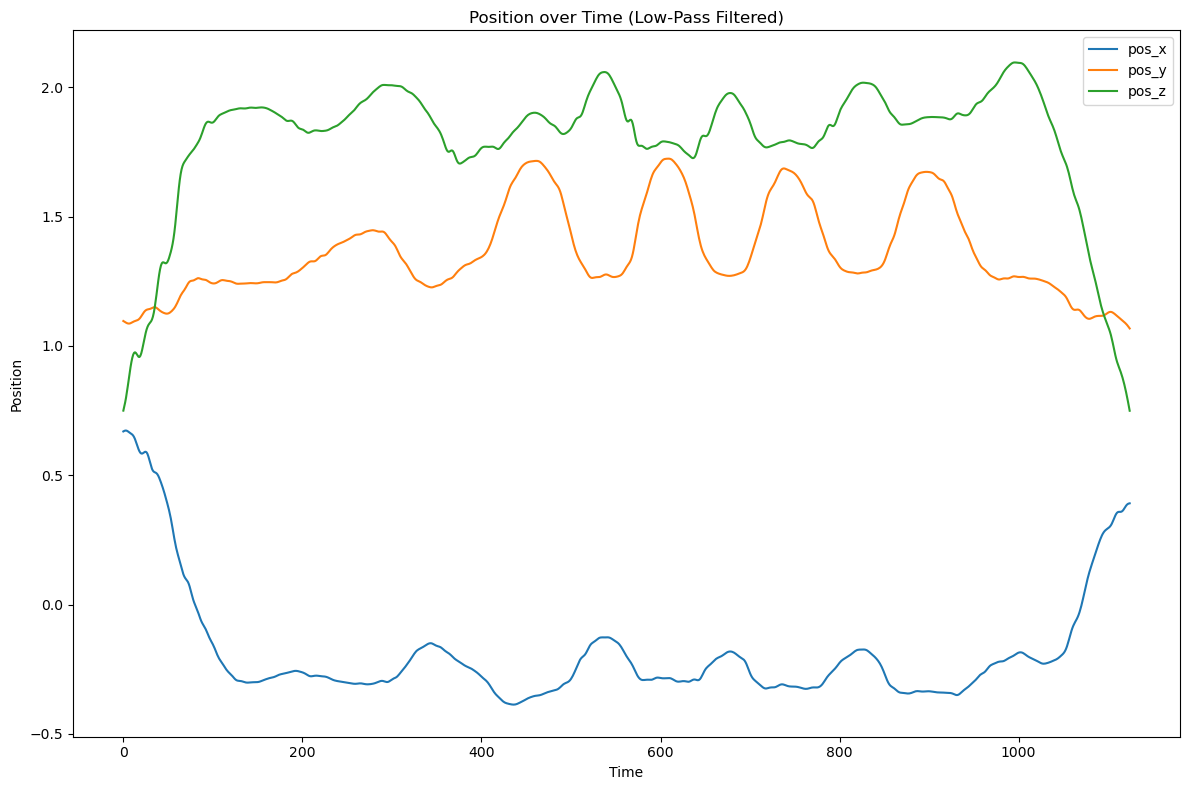

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def process_and_plot(csv_file_path, cutoff=0.1, fs=1.0, order=5):
    # Load the CSV file
    data = pd.read_csv(csv_file_path)
    
    # Identify the first row where movement starts
    threshold = 1e-6  # Small threshold to account for floating-point precision issues
    non_stationary_index_start = data[(data.diff().abs() > threshold).any(axis=1)].index[0]
    
    # Identify the last row where movement ends
    non_stationary_index_end = data[(data.diff().abs() > threshold).any(axis=1)].index[-1]
    
    # Remove leading and trailing stationary data
    cleaned_data = data.iloc[non_stationary_index_start:non_stationary_index_end + 1]
    
    # Apply low-pass filter for smoothing
    smoothed_data = pd.DataFrame()
    smoothed_data['pos_x'] = butter_lowpass_filter(cleaned_data['pos_x'], cutoff, fs, order)
    smoothed_data['pos_y'] = butter_lowpass_filter(cleaned_data['pos_y'], cutoff, fs, order)
    smoothed_data['pos_z'] = butter_lowpass_filter(cleaned_data['pos_z'], cutoff, fs, order)
    
    # Plotting the position data
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot positions
    ax.plot(smoothed_data.index, smoothed_data[['pos_x', 'pos_y', 'pos_z']])
    ax.set_title('Position over Time (Low-Pass Filtered)')
    ax.set_ylabel('Position')
    ax.set_xlabel('Time')
    ax.legend(['pos_x', 'pos_y', 'pos_z'])
    
    plt.tight_layout()
    plt.show()

# Provide the path to your CSV file
csv_file_path = '/home/awear/ros2_data/all_topics/_joint2_pos_rot.csv'
process_and_plot(csv_file_path)


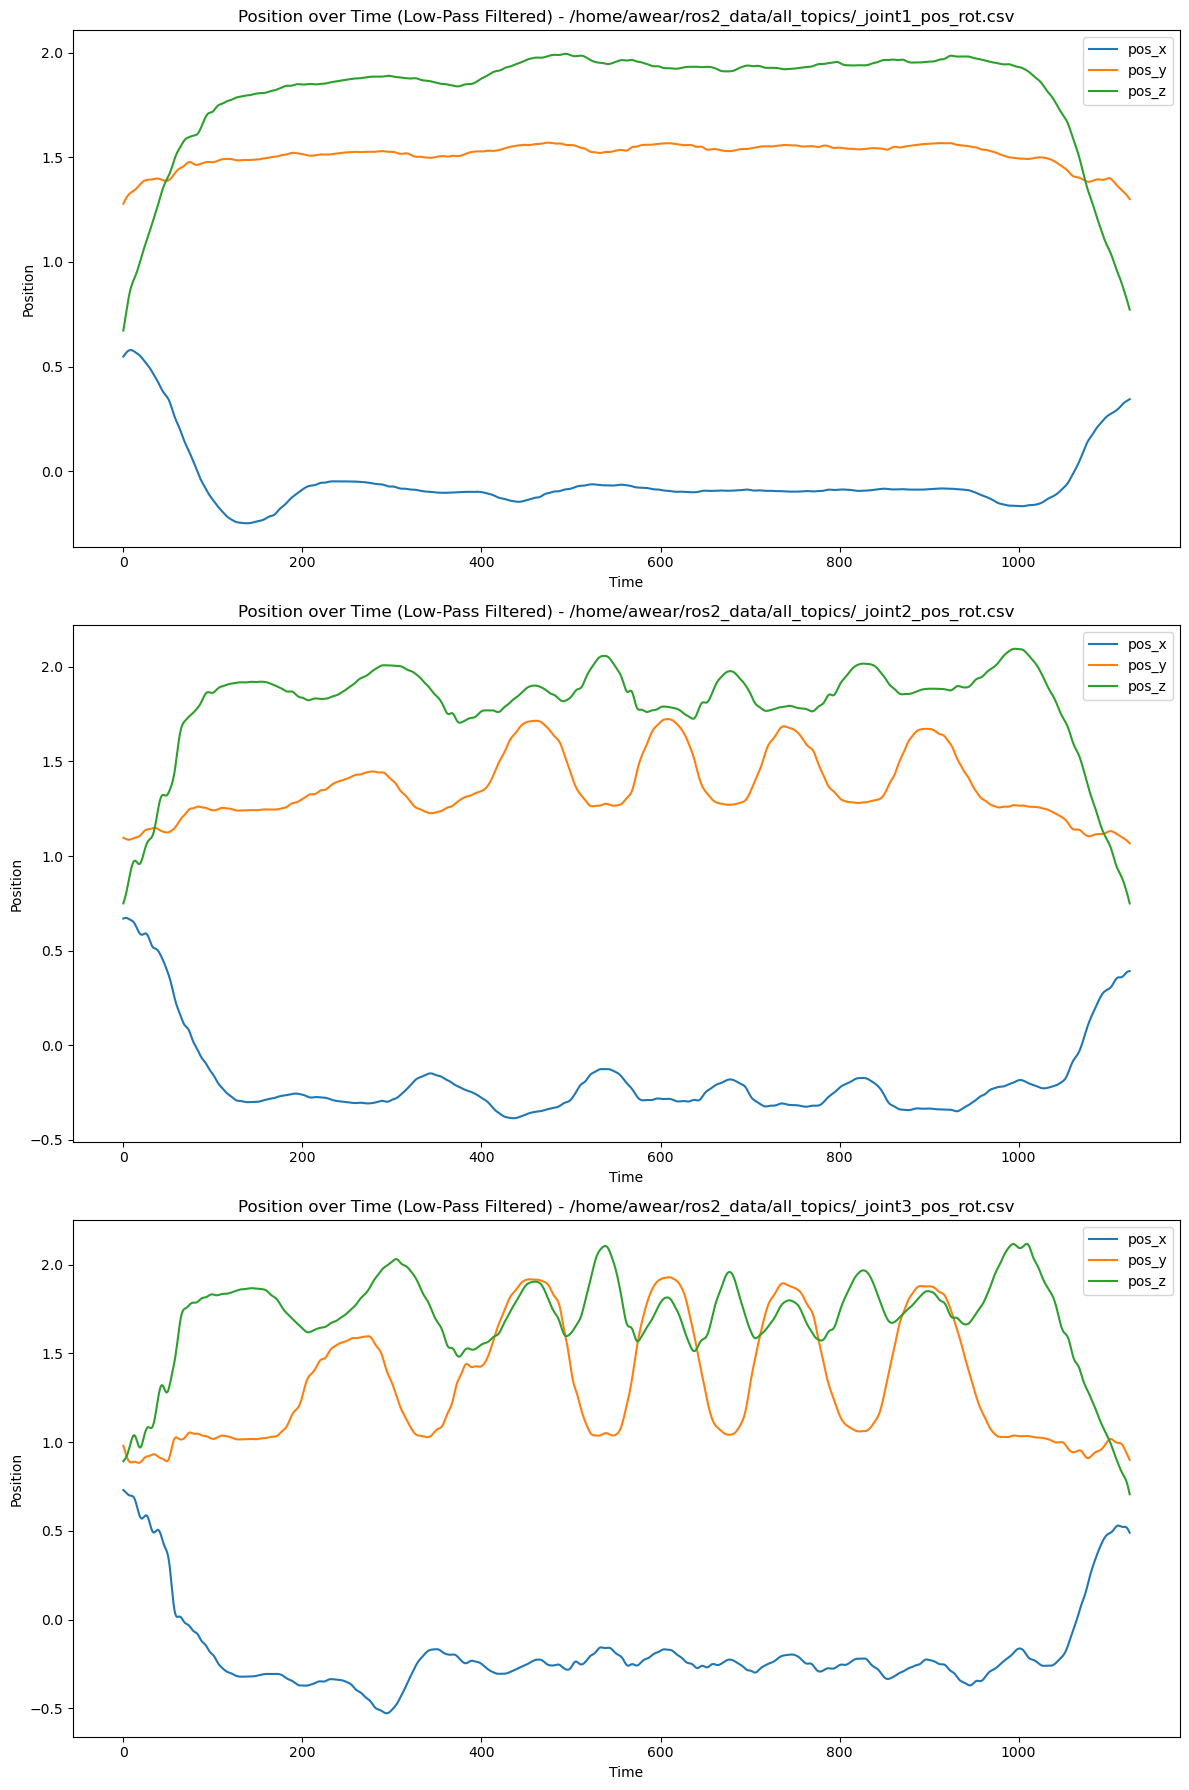

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def load_and_clean_data(file_path, threshold=1e-6):
    data = pd.read_csv(file_path)
    non_stationary_index_start = data[(data.diff().abs() > threshold).any(axis=1)].index[0]
    non_stationary_index_end = data[(data.diff().abs() > threshold).any(axis=1)].index[-1]
    cleaned_data = data.iloc[non_stationary_index_start:non_stationary_index_end + 1]
    return cleaned_data

def process_and_plot(file_paths, cutoff=0.1, fs=1.0, order=5):
    # Load and clean data
    cleaned_data = [load_and_clean_data(file_path) for file_path in file_paths]
    
    # Ensure that the timeframes are the same across all datasets
    start_indices = [df.index[0] for df in cleaned_data]
    end_indices = [df.index[-1] for df in cleaned_data]
    overall_start_index = max(start_indices)
    overall_end_index = min(end_indices)
    
    cleaned_data = [df.loc[overall_start_index:overall_end_index] for df in cleaned_data]
    
    # Apply low-pass filter for smoothing
    smoothed_data = []
    for data in cleaned_data:
        smoothed_data.append(pd.DataFrame({
            'pos_x': butter_lowpass_filter(data['pos_x'], cutoff, fs, order),
            'pos_y': butter_lowpass_filter(data['pos_y'], cutoff, fs, order),
            'pos_z': butter_lowpass_filter(data['pos_z'], cutoff, fs, order)
        }))
    
    # Plotting the position data
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    
    for i, (data, file_path) in enumerate(zip(smoothed_data, file_paths)):
        axs[i].plot(data.index, data[['pos_x', 'pos_y', 'pos_z']])
        axs[i].set_title(f'Position over Time (Low-Pass Filtered) - {file_path}')
        axs[i].set_ylabel('Position')
        axs[i].set_xlabel('Time')
        axs[i].legend(['pos_x', 'pos_y', 'pos_z'])
    
    plt.tight_layout()
    plt.show()

# Provide the paths to your CSV files
csv_file_paths = [
    '/home/awear/ros2_data/all_topics/_joint1_pos_rot.csv',
    '/home/awear/ros2_data/all_topics/_joint2_pos_rot.csv',
    '/home/awear/ros2_data/all_topics/_joint3_pos_rot.csv'
]

process_and_plot(csv_file_paths)


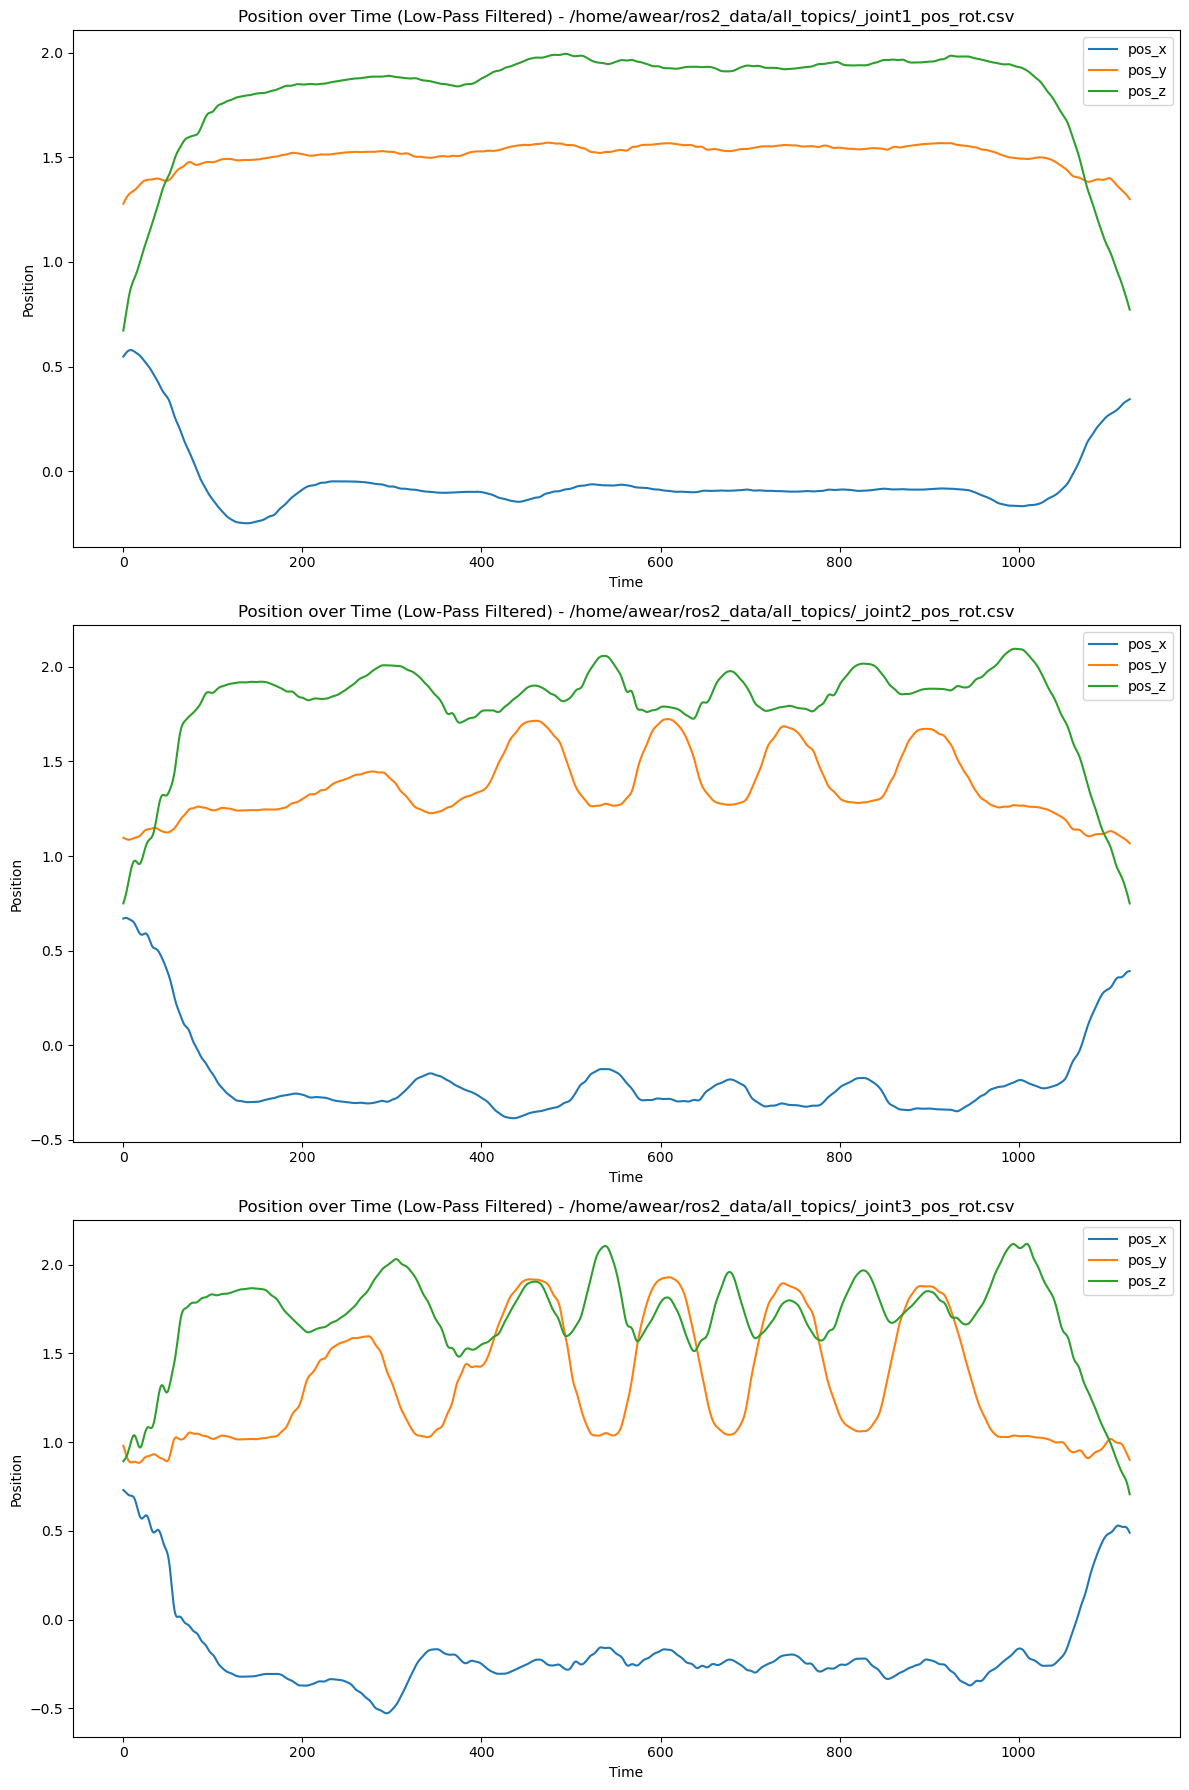

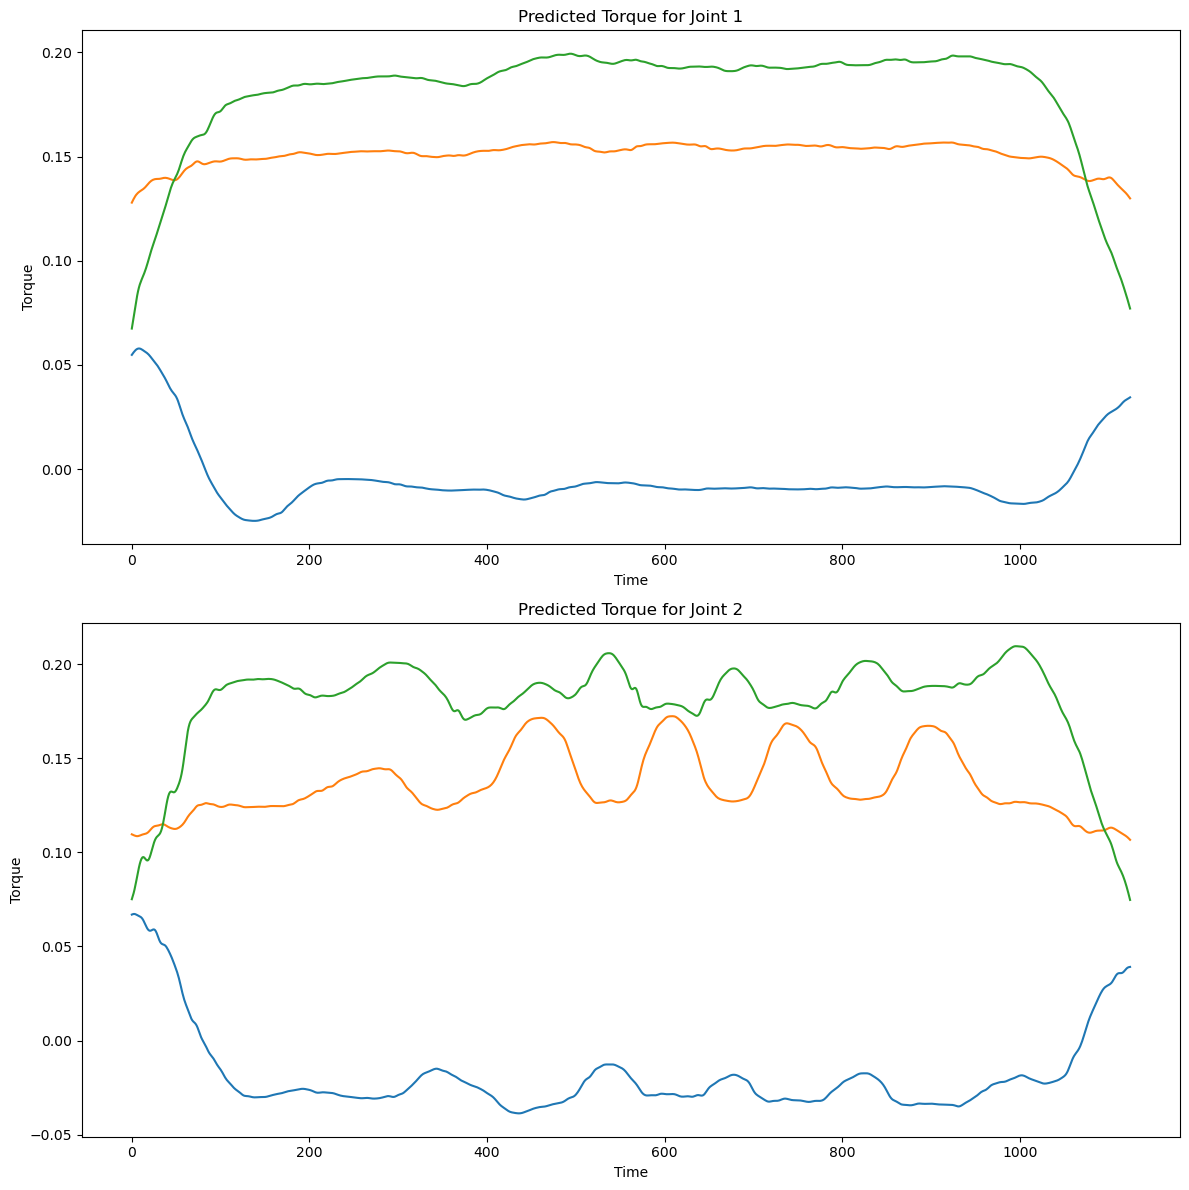

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def load_and_clean_data(file_path, threshold=1e-6):
    data = pd.read_csv(file_path)
    non_stationary_index_start = data[(data.diff().abs() > threshold).any(axis=1)].index[0]
    non_stationary_index_end = data[(data.diff().abs() > threshold).any(axis=1)].index[-1]
    cleaned_data = data.iloc[non_stationary_index_start:non_stationary_index_end + 1]
    return cleaned_data

def calculate_velocity_acceleration(position_data, fs):
    velocity = np.gradient(position_data, axis=0) * fs
    acceleration = np.gradient(velocity, axis=0) * fs
    return velocity, acceleration

def process_and_plot(file_paths, cutoff=0.1, fs=1.0, order=5):
    # Load and clean data
    cleaned_data = [load_and_clean_data(file_path) for file_path in file_paths]
    
    # Ensure that the timeframes are the same across all datasets
    start_indices = [df.index[0] for df in cleaned_data]
    end_indices = [df.index[-1] for df in cleaned_data]
    overall_start_index = max(start_indices)
    overall_end_index = min(end_indices)
    
    cleaned_data = [df.loc[overall_start_index:overall_end_index] for df in cleaned_data]
    
    # Apply low-pass filter for smoothing
    smoothed_data = []
    for data in cleaned_data:
        smoothed_data.append(pd.DataFrame({
            'pos_x': butter_lowpass_filter(data['pos_x'], cutoff, fs, order),
            'pos_y': butter_lowpass_filter(data['pos_y'], cutoff, fs, order),
            'pos_z': butter_lowpass_filter(data['pos_z'], cutoff, fs, order)
        }))
    
    # Calculate velocity and acceleration
    velocities = []
    accelerations = []
    for data in smoothed_data:
        velocity, acceleration = calculate_velocity_acceleration(data.values, fs)
        velocities.append(velocity)
        accelerations.append(acceleration)
    
    # Plotting the position data
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))
    
    for i, (data, file_path) in enumerate(zip(smoothed_data, file_paths)):
        axs[i].plot(data.index, data[['pos_x', 'pos_y', 'pos_z']])
        axs[i].set_title(f'Position over Time (Low-Pass Filtered) - {file_path}')
        axs[i].set_ylabel('Position')
        axs[i].set_xlabel('Time')
        axs[i].legend(['pos_x', 'pos_y', 'pos_z'])
    
    plt.tight_layout()
    plt.show()

    return smoothed_data, velocities, accelerations

# Provide the paths to your CSV files
csv_file_paths = [
    '/home/awear/ros2_data/all_topics/_joint1_pos_rot.csv',
    '/home/awear/ros2_data/all_topics/_joint2_pos_rot.csv',
    '/home/awear/ros2_data/all_topics/_joint3_pos_rot.csv'
]

smoothed_data, velocities, accelerations = process_and_plot(csv_file_paths)

# Here, implement the torque prediction models (parametric, nonparametric, semiparametric)
# For simplicity, we'll implement the parametric model in this example

def predict_torque_parametric(position, velocity, equilibrium_position, stiffness, damping):
    torque = stiffness * (position - equilibrium_position) + damping * velocity
    return torque

# Example equilibrium position, stiffness, and damping values (these should be tuned to your specific case)
equilibrium_position = np.array([0, 0, 0])
stiffness = np.array([0.1, 0.1, 0.1])
damping = np.array([0.01, 0.01, 0.01])

# Predict torques for each joint
predicted_torques = []
for pos, vel in zip(smoothed_data[:2], velocities[:2]):  # Only consider the first two joints (shoulder and elbow)
    torque = predict_torque_parametric(pos.values, vel, equilibrium_position, stiffness, damping)
    predicted_torques.append(torque)

# Plot predicted torques
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

for i, torque in enumerate(predicted_torques):
    axs[i].plot(torque)
    axs[i].set_title(f'Predicted Torque for Joint {i+1}')
    axs[i].set_ylabel('Torque')
    axs[i].set_xlabel('Time')

plt.tight_layout()
plt.show()
